# EDA 

### 0. Importing necessary Libraries

In [1]:
import gc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
DATA_FOLDER = '../data/'
import utils

### 1. Read the last saved file

In [2]:
%%time
df_sales = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_combined.csv'))
sales_util = utils.SalesUtils('')

Wall time: 7.72 s


In [3]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,weekday,weekdayno,year,item_category_id,parent_cat_id,parent_cat,city_id,city_name,is_holiday
0,2013-01-02,0,59,22154,999.0,1,2,1,Wednesday,2,2013,37,6,cinema,29,Yaroslavl,0
1,2013-05-16,4,59,2573,249.0,1,16,5,Thursday,3,2013,55,13,music,29,Yaroslavl,0
2,2013-01-26,0,59,2574,399.0,1,26,1,Saturday,5,2013,55,13,music,29,Yaroslavl,0
3,2013-01-09,0,59,2574,399.0,1,9,1,Wednesday,2,2013,55,13,music,29,Yaroslavl,0
4,2013-02-24,1,59,2574,399.0,1,24,2,Sunday,6,2013,55,13,music,29,Yaroslavl,0


### 2. Checking for Holiday Sales against non holiday sales in a particular month

##### for all years and months

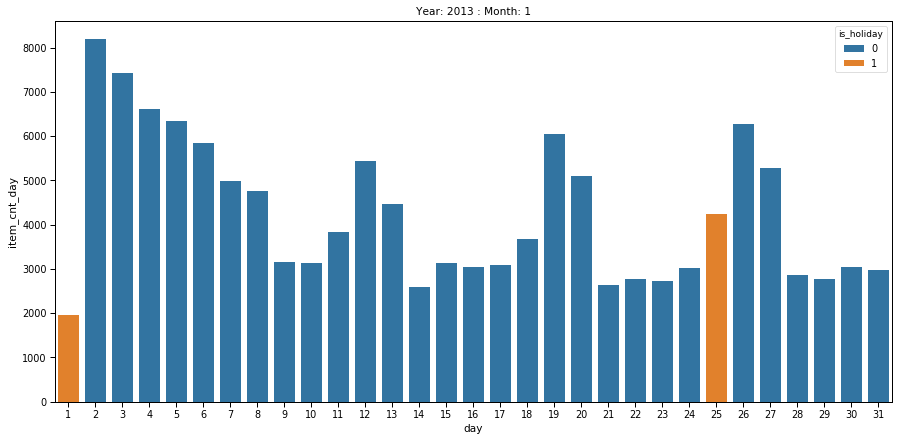

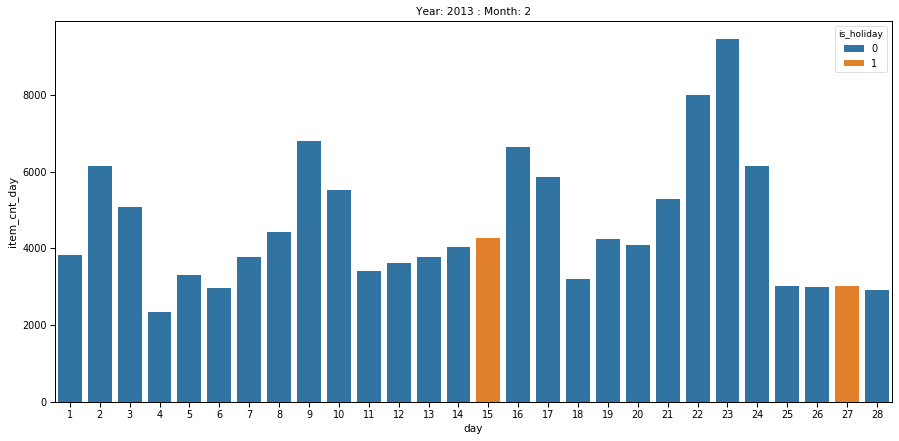

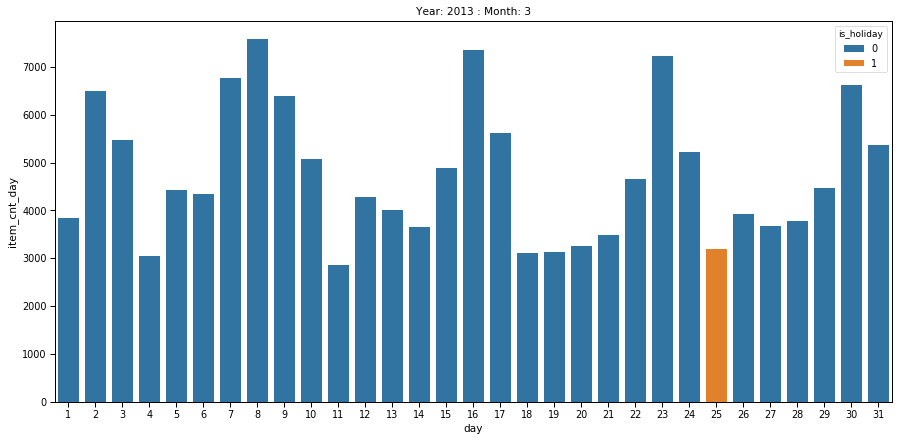

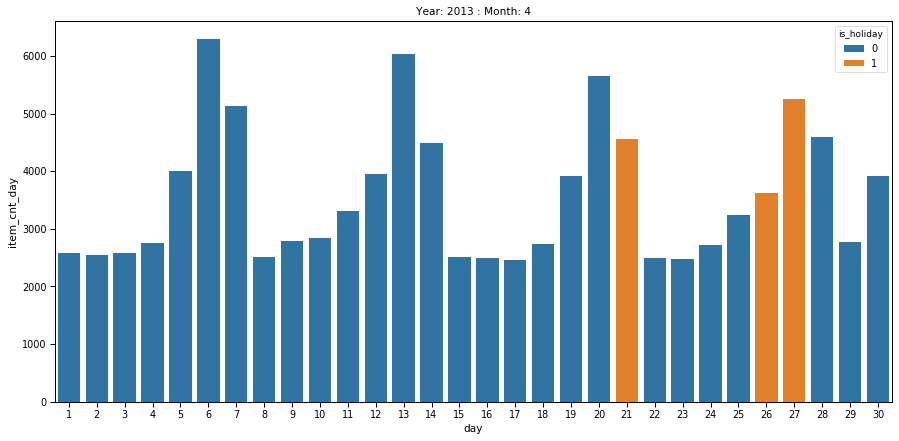

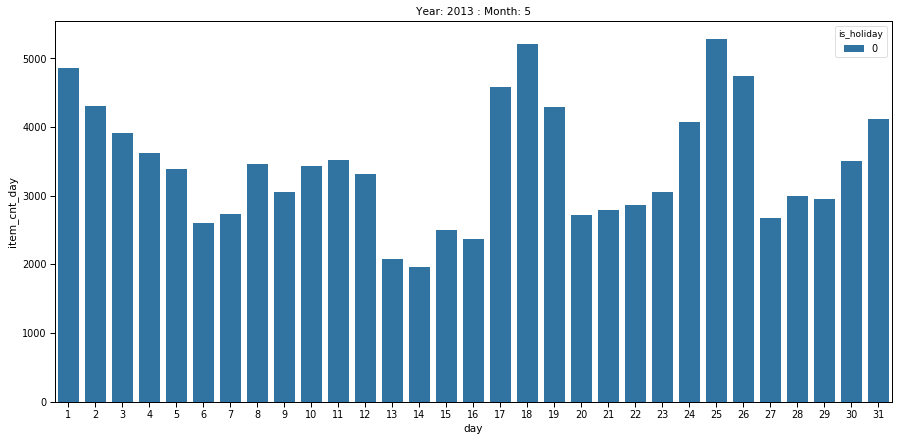

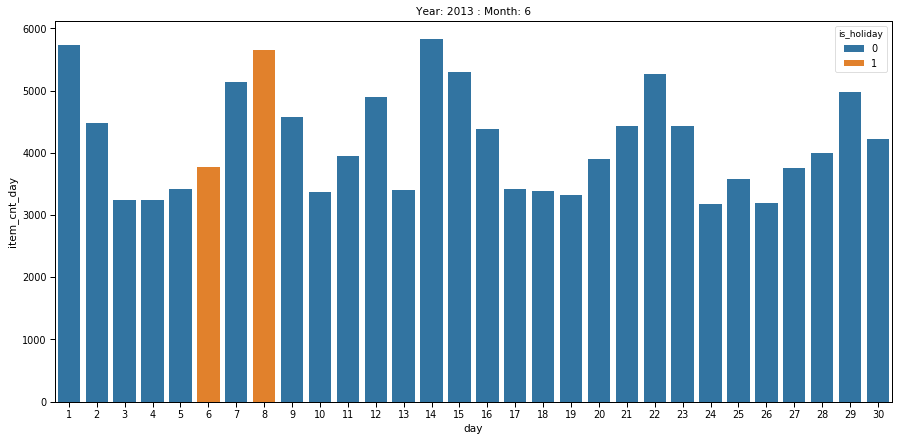

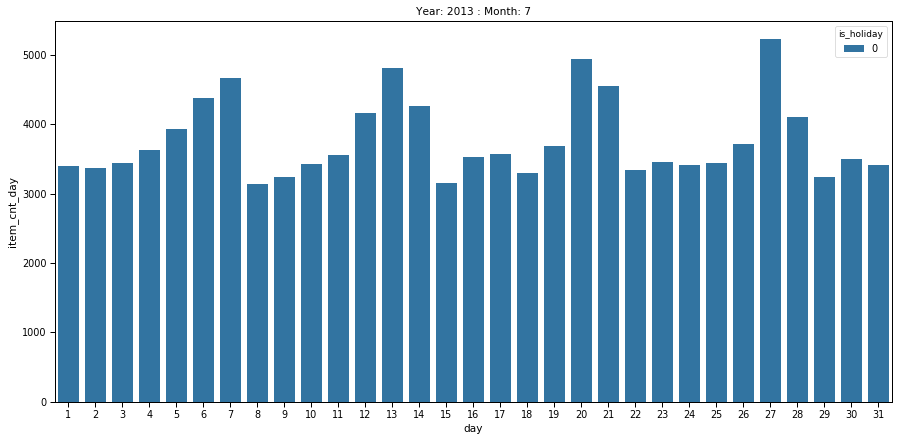

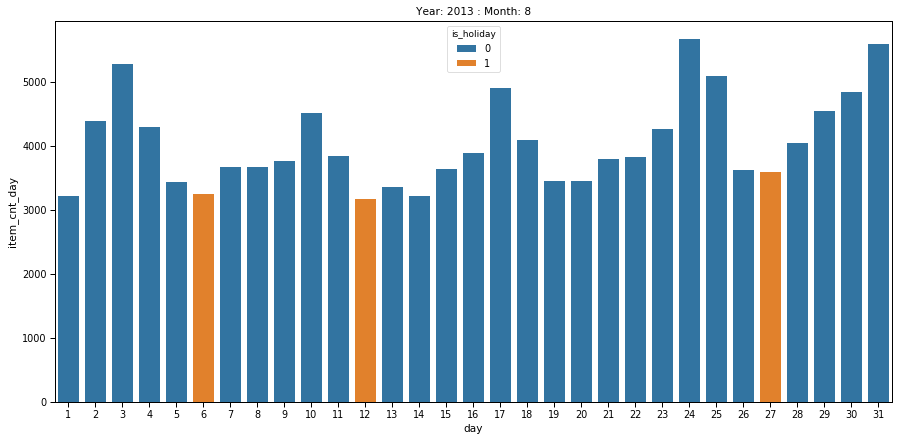

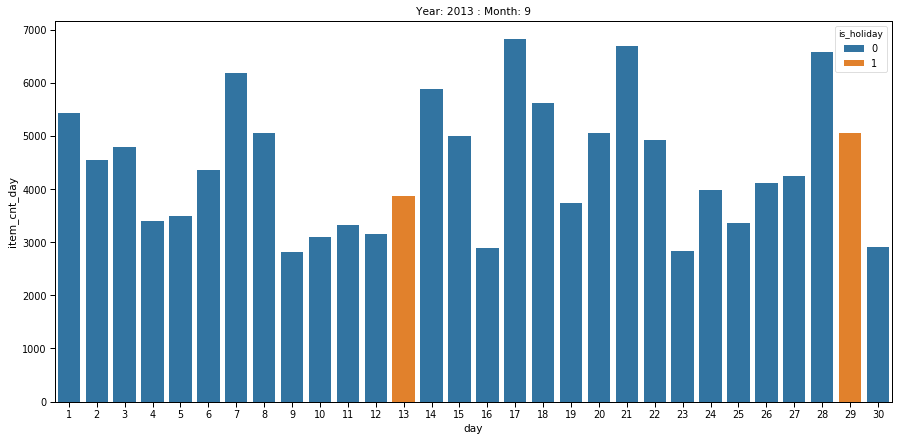

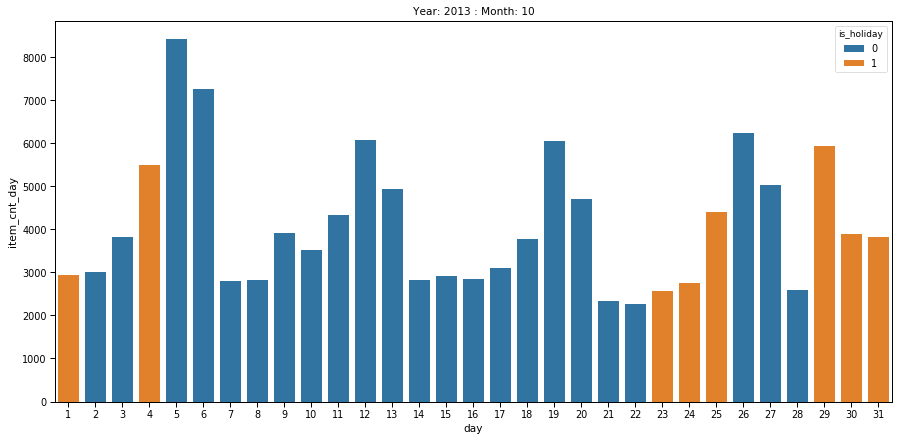

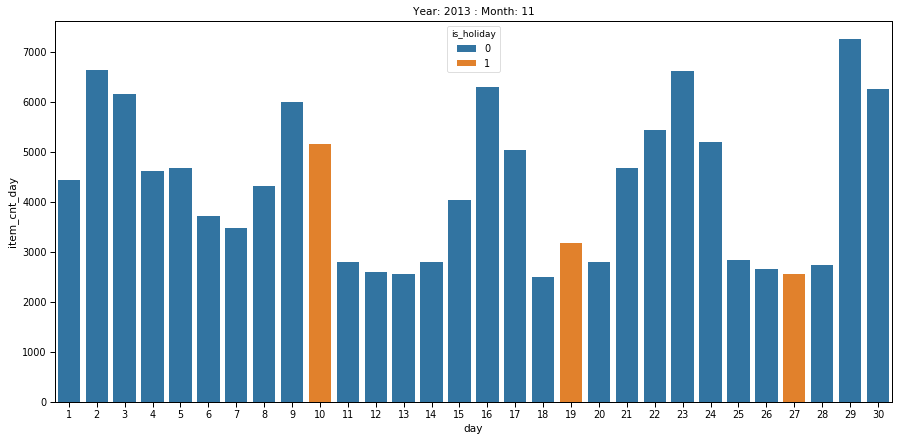

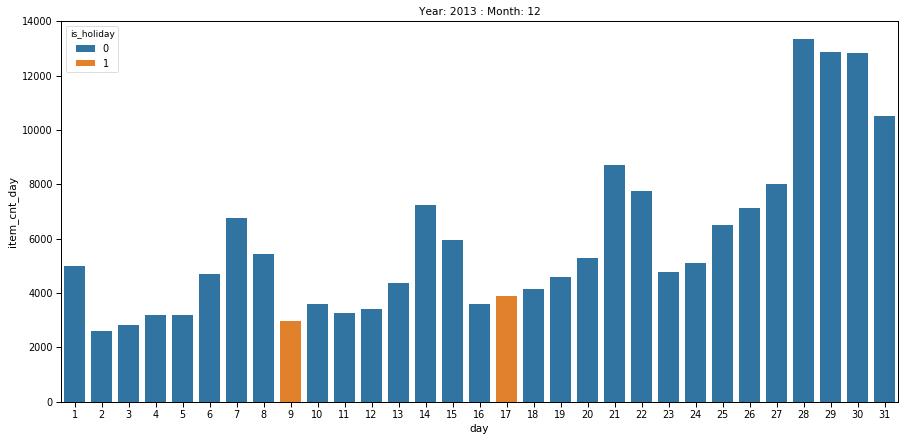

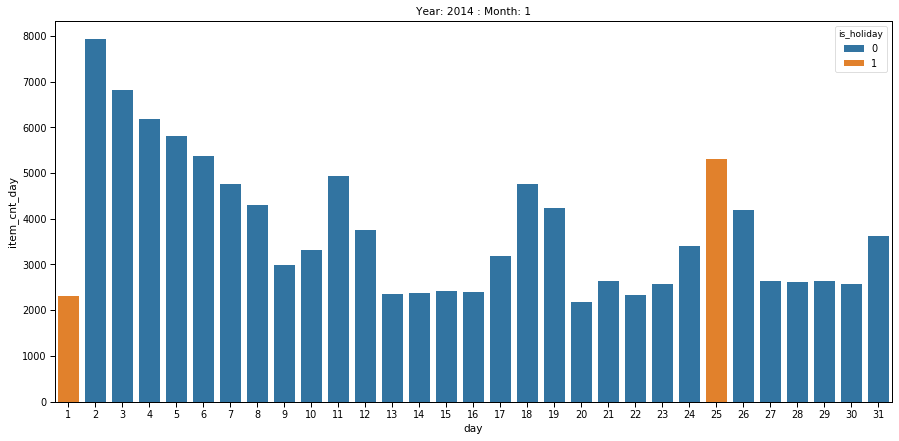

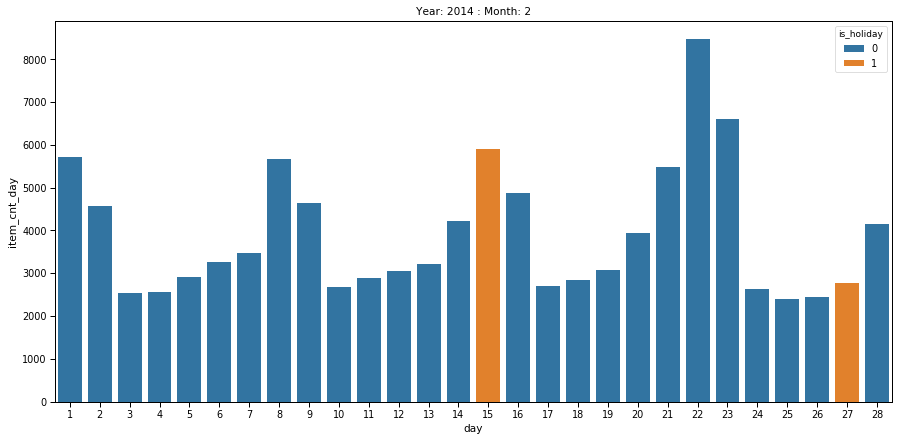

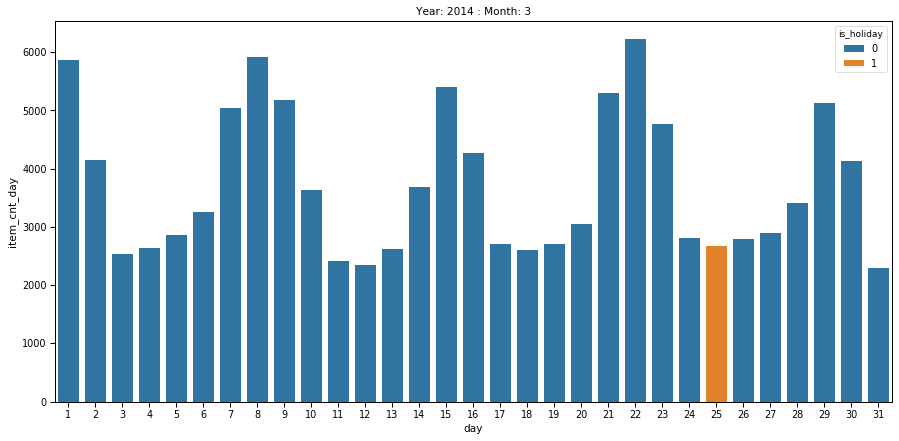

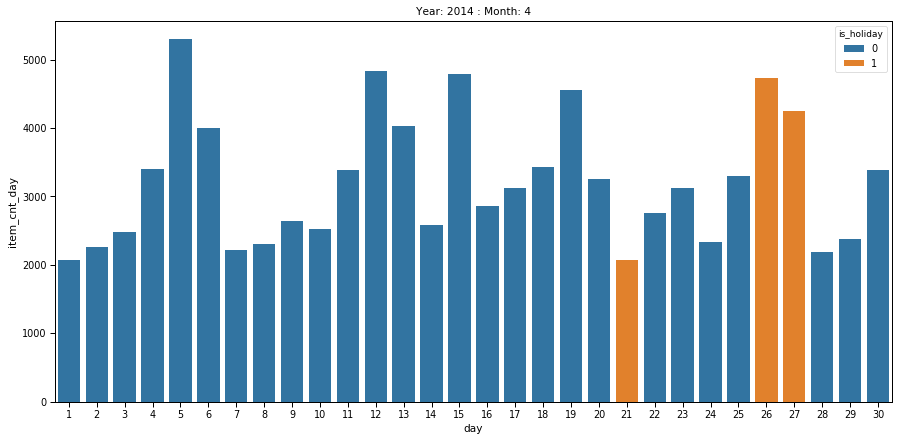

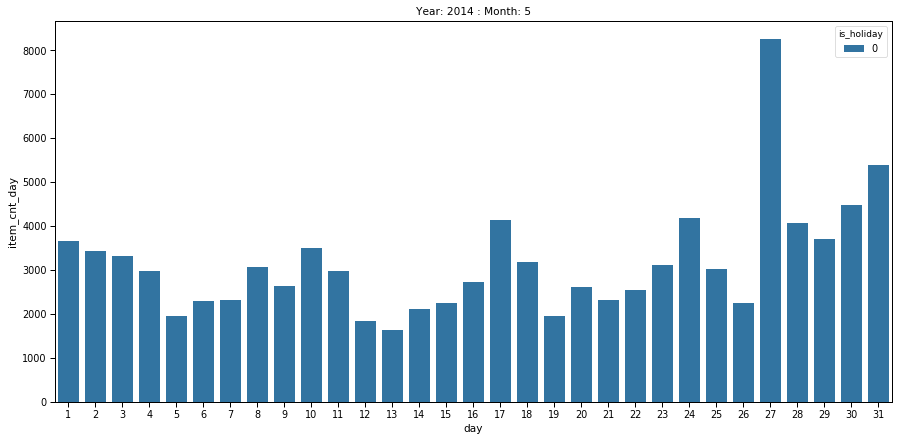

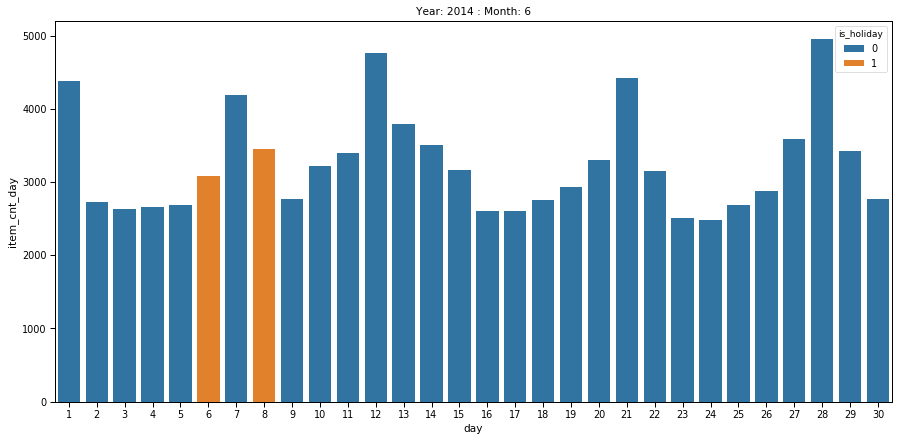

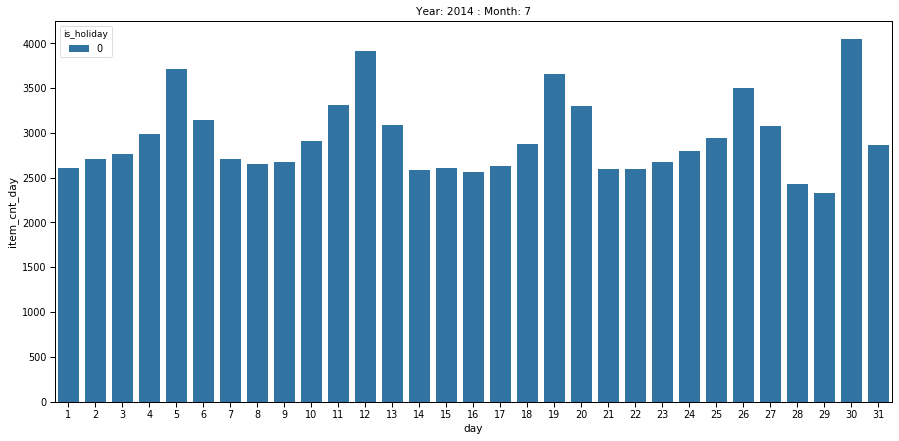

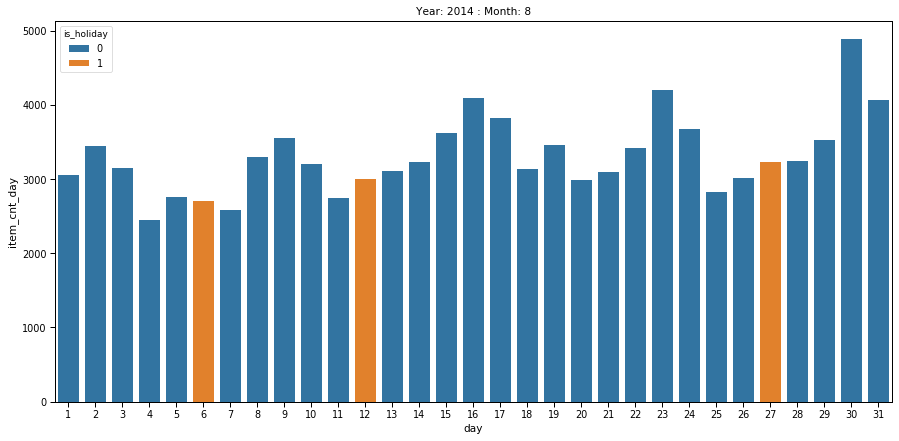

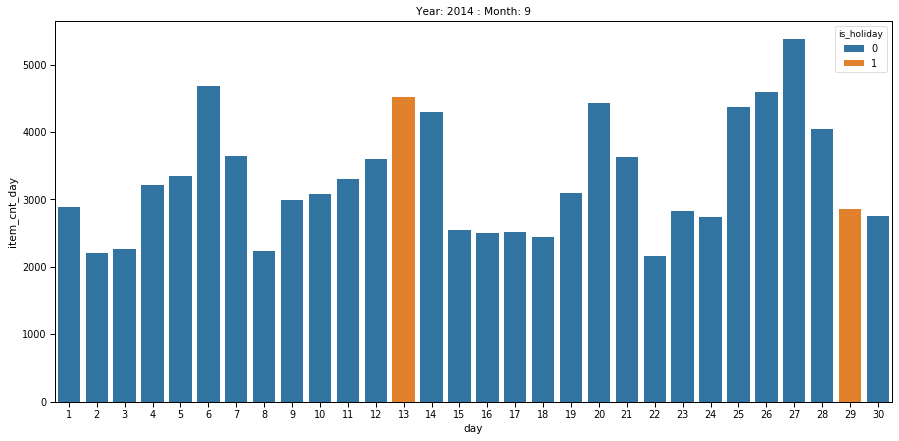

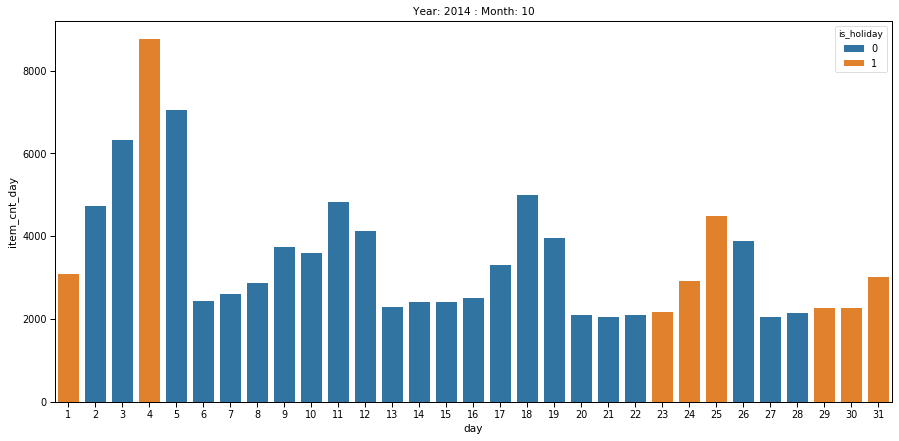

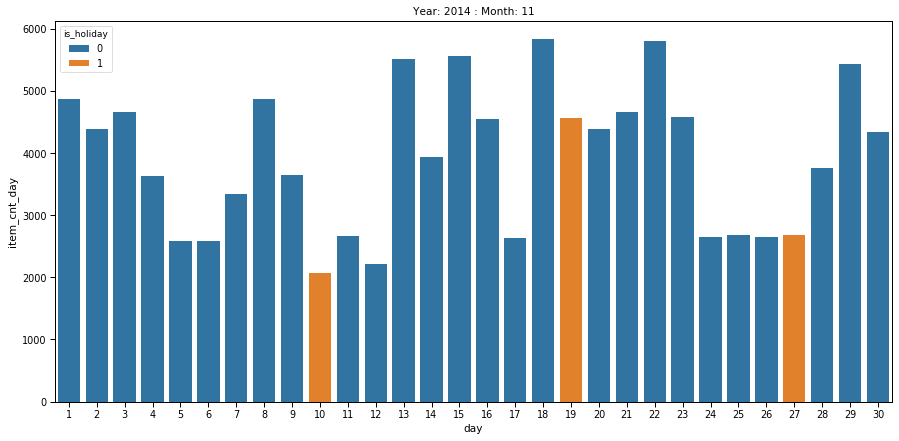

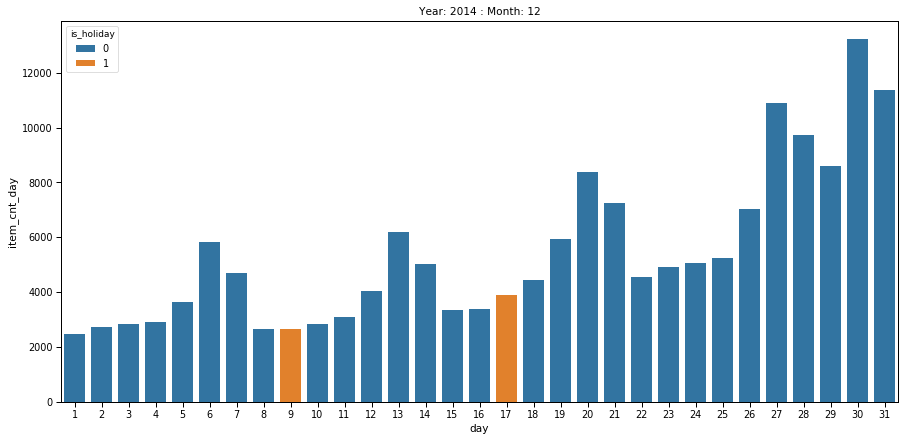

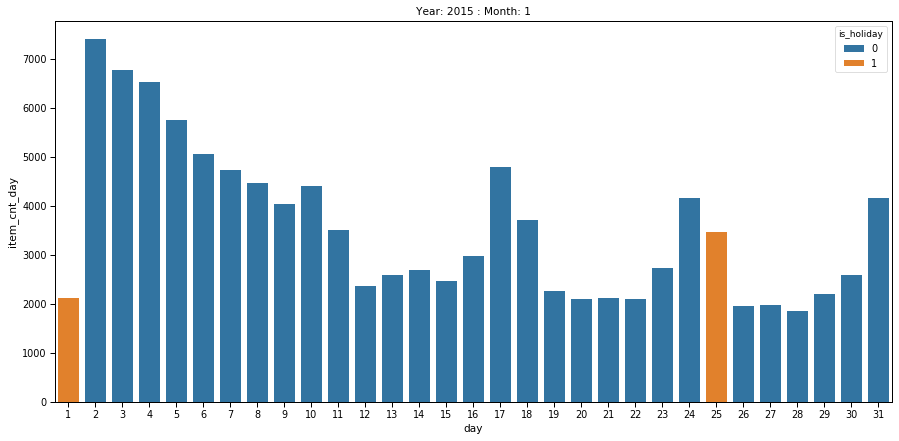

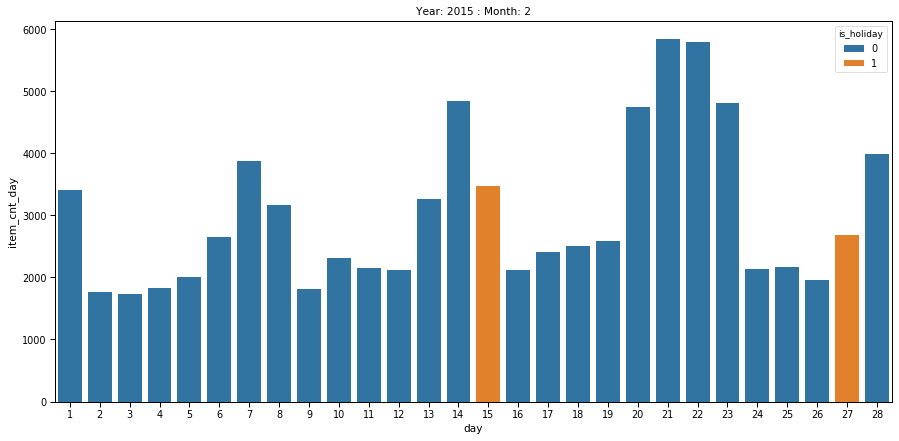

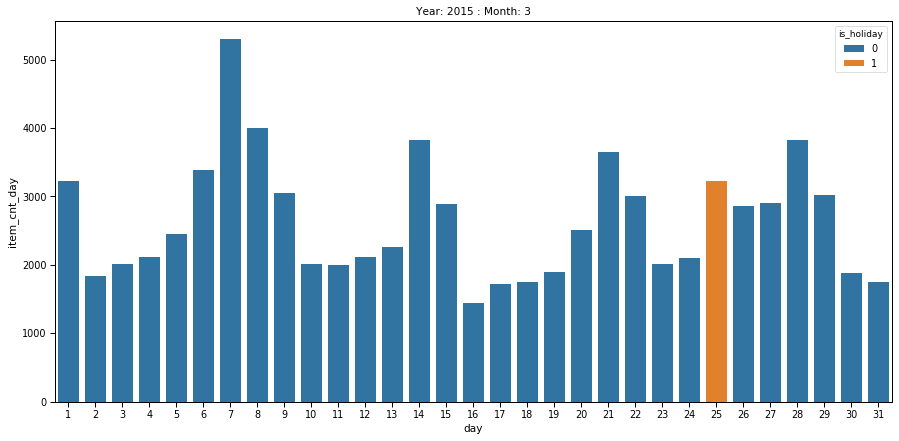

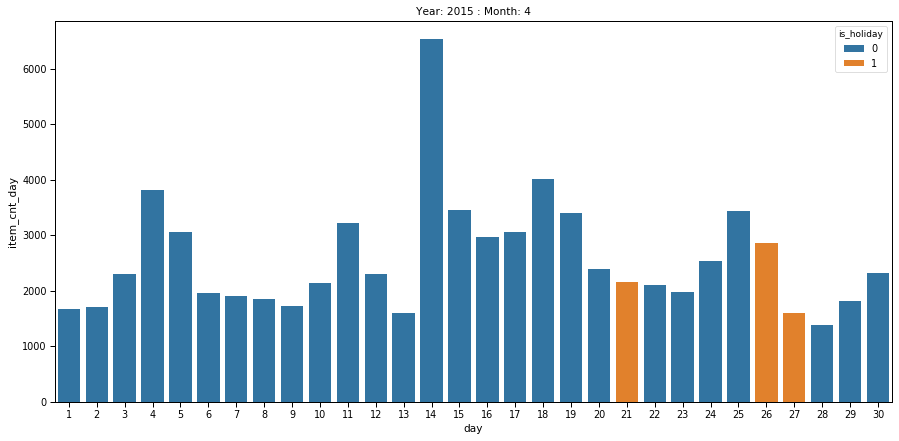

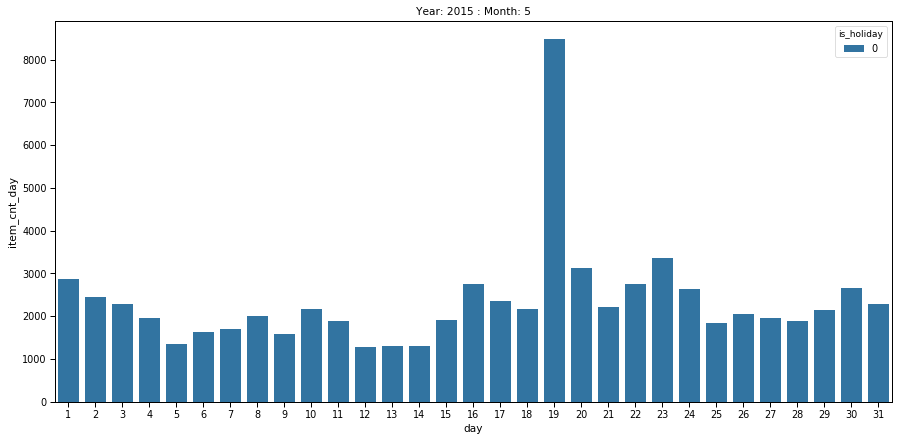

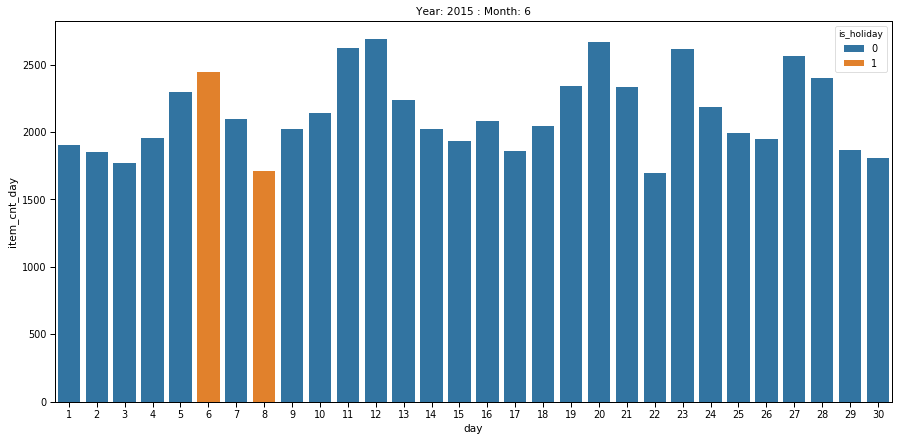

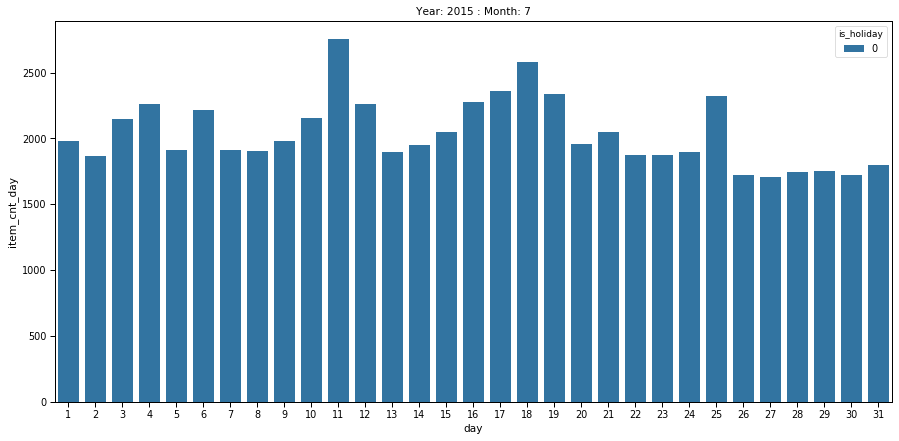

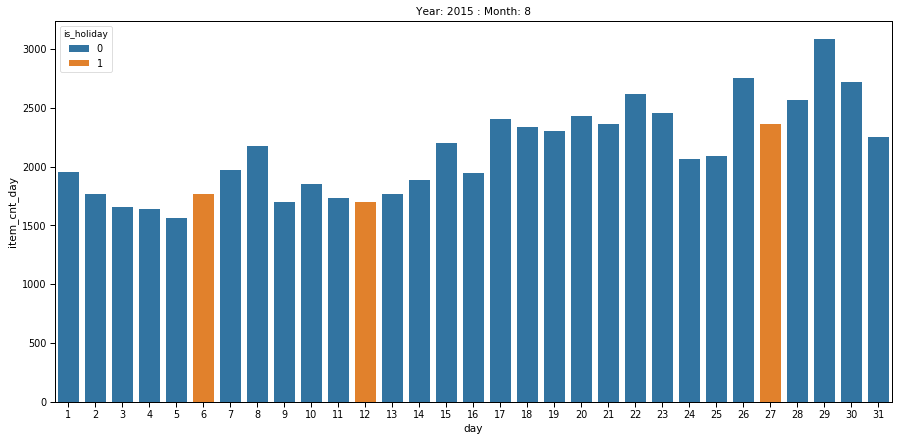

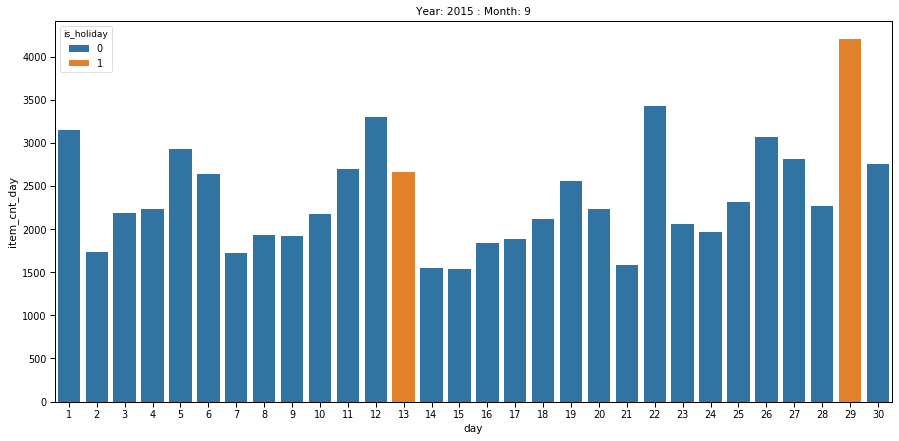

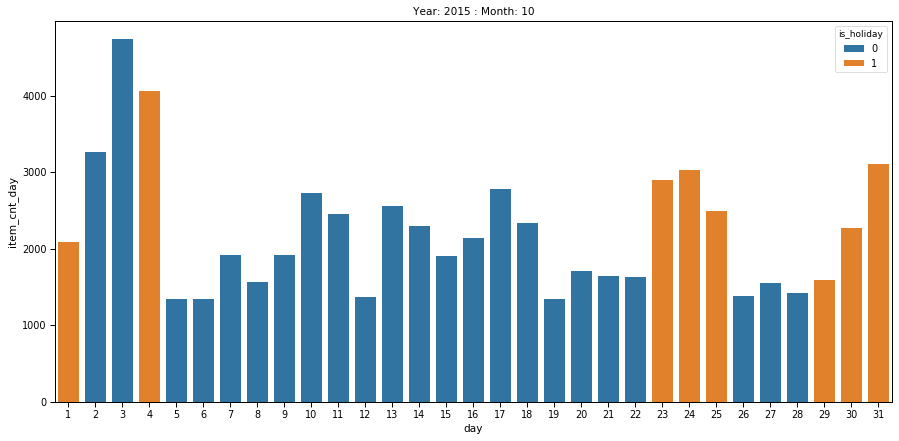

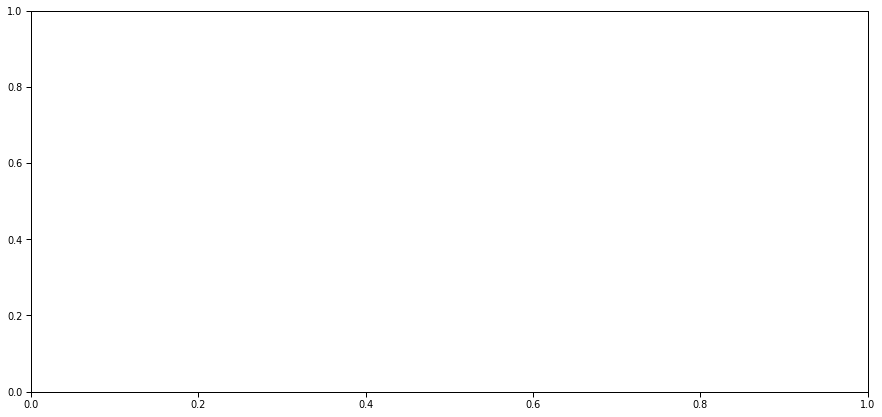

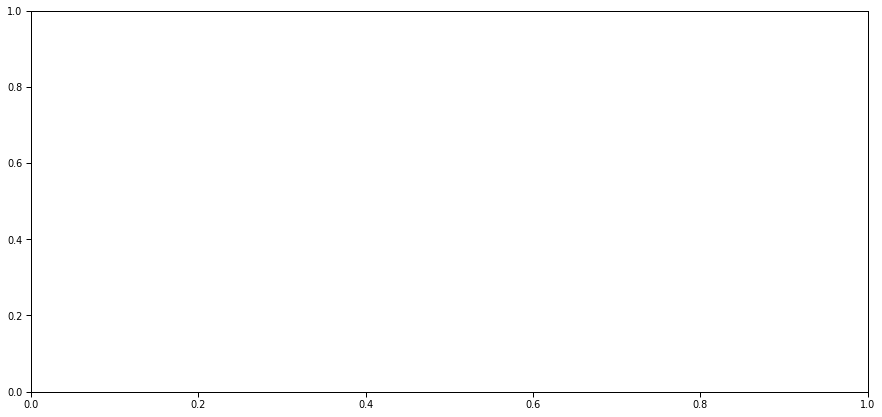

In [4]:
years = [2013,2014,2015]
for year in years:
    for month in range(1,13):
        sales_util.plot_sales_by_day(year,month,df_sales)

Our Data analysis reveal that public holiday aren't playing any major part in these plots. 

Rather the weekends (saturday, sunday) there is high sales. This clearly shows in almost all plots

Our strategy would be to count the Saturday and Sunday by month-year as follow:
- num_saturdays
- num_sundays

hopefully, the regression algorithm would be able to understand the pattern from it and it will be helpful in 
correctly identifying the future sale predictions.

In [5]:
df_sales[(df_sales['month']==7) & (df_sales['year']==2013) & (df_sales['day'].isin([7,13,20,27]))]['weekday'].unique()

array(['Sunday', 'Saturday'], dtype=object)

### 3. Checking for Weekend Trends, for all years

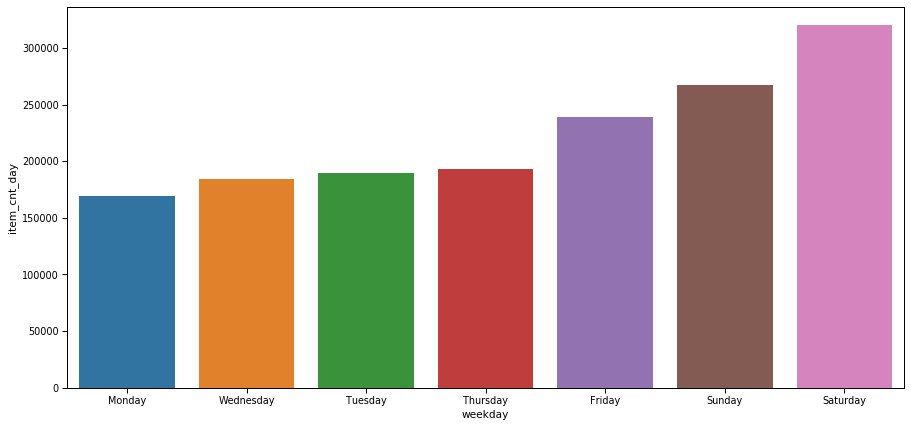

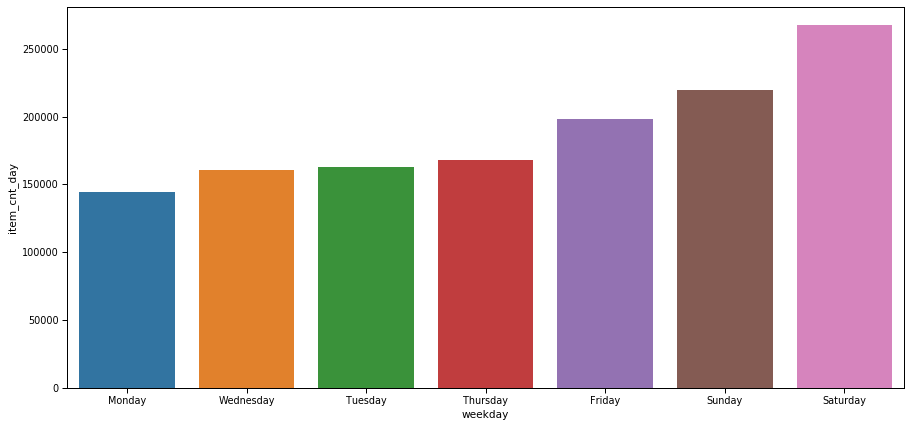

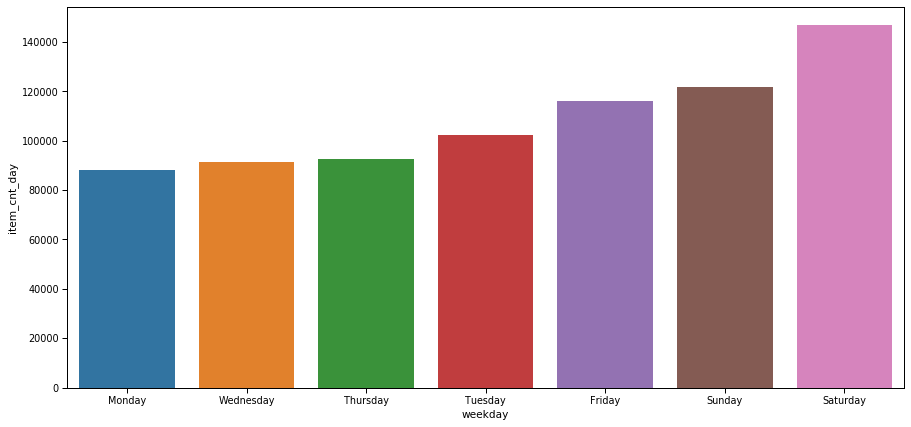

In [6]:
for year in years:
    sales_util.plot_sales_by_weekday(year,df_sales)

### 5. Checking for Cities Performance
In this analysis, we will try to figure out whether the top performing shops are in the top performing cities?

<class 'pandas.core.frame.DataFrame'>
top 5 cities are : [10 28  6 20 27]
<class 'pandas.core.frame.DataFrame'>
top 5 cities are : [10 28  6 20 27]
<class 'pandas.core.frame.DataFrame'>
top 5 cities are : [10 28 20 27  3]


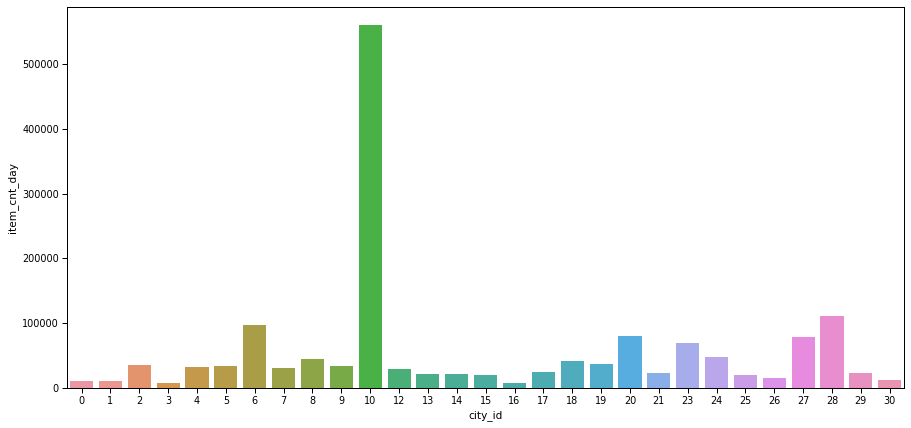

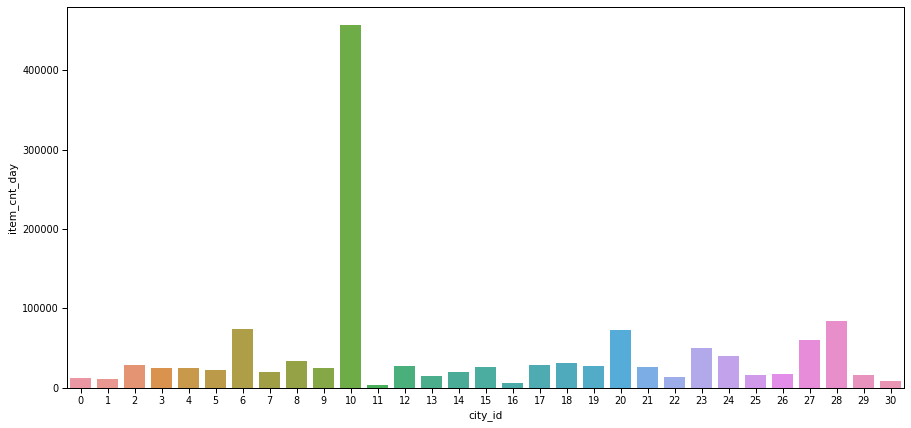

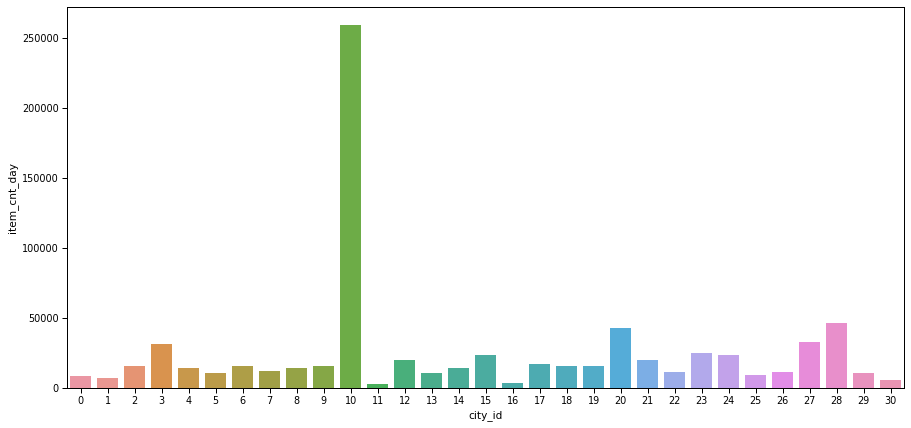

In [7]:
for year in years:
    sales_util.plot_sales_by_x('city_id',year,df_sales)

So, 10 30  6 29 22 are the cities id which are top performing. let's see their names

In [8]:
df_sales[df_sales.city_id.isin([10,28,6,20,27])][['city_id','city_name']].drop_duplicates().reset_index(drop=True)

,city_id,city_name
0,10,Moscow
1,27,Voronezh
2,6,Khimki
3,20,St.Petersburg
4,28,Yakutsk
